In [10]:
import sys
sys.path.append('../../fit_fs8/')
import fitfs8
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sigma_8 = 0.8466
kmin=None
cosmo = {'H0': 67., 'Om0': 0.32}
kdic = {'vpec_c2est': 'vpec', 
        'vpec_c2err': 'vpec_err'} 
file = './dmu_cat.csv'
fitter=fitfs8.fs8_fitter('./ptt_DEM.txt', 
                         sigma_8, file, pws_type='regpt',
                         kmin=kmin, kmax=1, 
                         cosmo=cosmo, key_dic=kdic)

In [3]:
fitter.grid_data(60,use_mu=True)

Create velocities grid
Use dmu
Apply mask : No
N sn = 3556


(array([  4.,   9.,  22.,  31.,  41.,  69.,  85., 113., 118.,  45.]),
 array([0.00950009, 0.02107377, 0.03264745, 0.04422113, 0.05579481,
        0.06736849, 0.07894217, 0.09051585, 0.10208953, 0.11366321,
        0.1252369 ]),
 <BarContainer object of 10 artists>)

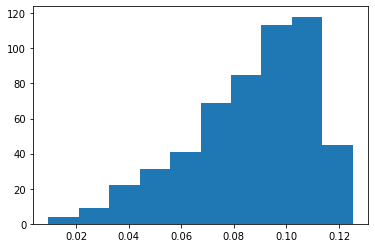

In [5]:
plt.hist(fitter.data_grid['z'])

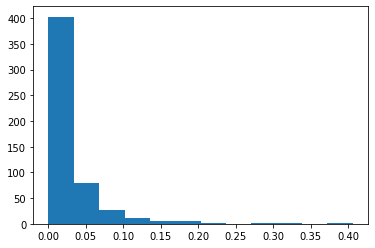

In [9]:
plt.hist(fitter.data_grid['vel_dmu'],bins=12);

In [4]:
fitter.fit_iminuit(60., use_mu=True)

Grid size = 60.0
kmin = 0.0001, kmax = 1
Create velocities grid
Use dmu
Apply mask : No
N sn = 3556
Grid data : 57.58 seconds
Apply grid window
Compute cosmo covariance : 7.93 seconds
Don't use RS dampling
Init iminuit : 0.00 seconds
Begin fit
Fit iminuit : 0.06 minutes


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1537                      │              Nfcn = 89               │
│ EDM = 2.34e-06 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ fs8   │   0.101   │   0.028   │            │            │   0.1   │    2    │       │
│ 1 │ sig_v │    0e3    │    2e3    │            │            │    0    │  3000   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │      fs8    sig_v │
├───────┼───────────────────┤
│   fs8 │ 8.67e-05  9.3e-05 │
│ sig_v │  9.3e-05      649 │
└───────┴───────────────────┘

In [12]:
df= pd.read_csv('./dmu_cat.csv')

array([[<AxesSubplot:title={'center':'dmu'}>]], dtype=object)

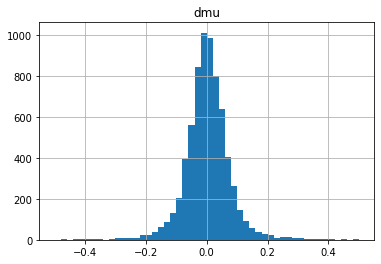

In [18]:
df.hist('dmu', range=[-0.5, 0.5],bins=50)

In [19]:
df

,Unnamed: 0,ra,dec,zcos,zobs,vpec_true,vpec_c2est,vpec_c2err,vpec_west,vpec_werr,sim_x1,sim_c,sim_mb,x1,c,mb,chi2,ndof,dmu,dmu_err
0,0,6.266094,0.471257,0.077666,0.077153,-142.663037,-181.330047,199.005235,-164.202718,193.308354,-0.034524,0.001705,18.688507,0.128293,0.010805,18.695634,49.727534,36.0,0.016605,0.016605
1,1,0.708940,0.346843,0.102614,0.102708,25.452510,-44.120917,971.131816,-38.896168,941.843399,-0.204447,0.022463,19.415862,-0.184377,0.015777,19.398433,26.788294,36.0,0.003025,0.003025
2,2,1.067581,0.529971,0.097938,0.098830,243.427915,239.339624,427.691607,209.922714,419.465103,-0.290468,-0.062535,19.076631,-0.346041,-0.070532,19.061737,50.342150,47.0,-0.016906,-0.016906
3,3,0.480077,1.065828,0.087813,0.086797,-279.821169,-367.231095,218.784272,-327.698005,210.530321,1.452924,-0.060060,18.580608,1.673863,-0.047892,18.592011,131.882858,165.0,0.029720,0.029720
4,4,1.288684,1.310942,0.074985,0.074469,-143.810770,-420.204653,288.650209,-379.942603,277.521855,-0.468176,0.075146,18.881936,-0.225914,0.081826,18.893435,90.696769,80.0,0.039707,0.039707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,0.706147,1.118659,0.090417,0.092170,481.866266,634.374586,222.361362,573.611546,221.965069,0.511292,-0.074797,18.747959,0.475757,-0.071951,18.749196,211.818539,244.0,-0.049233,-0.049233
6996,6996,4.917505,0.235790,0.055614,0.053806,-513.583117,-89.345623,219.005683,-84.129150,214.729156,-0.522274,-0.031959,17.895597,-0.553001,-0.011206,17.904929,70.548421,70.0,0.011935,0.011935
6997,6997,6.272038,0.982839,0.108148,0.108792,174.221023,848.540605,639.801028,753.389013,637.389398,1.041551,0.086626,19.551514,0.843172,0.091776,19.549877,106.868688,123.0,-0.055617,-0.055617
6998,6998,0.158005,0.262922,0.105492,0.103806,-457.232717,1150.021219,1279.298074,1031.434411,1291.555412,-1.452199,-0.019888,19.524864,-1.557205,0.005205,19.502150,37.704570,42.0,-0.079441,-0.079441
